<a href="https://colab.research.google.com/github/farshid101/Thesis-2024/blob/main/Dataset_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Assuming your DataFrame `df` has a 'label' column with values like 'positive', 'negative', 'neutral'

# Create a sample DataFrame for demonstration
# Replace this with loading your actual dataset if needed, e.g., df = pd.read_csv('your_file.csv')

df = pd.read_csv('/content/filtered (1).csv')
df

,text,label
0,তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো দে...,positive
1,🎯 ব্রহ্মপুত্র নদের ওপর নির্মিত ৯.১৫ কিলোমিটারে...,positive
2,😊 ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা,positive
3,2022 এর 25 এ জুন 🥰🥰,neutral
4,অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...,positive
...,...,...
5719,সব পিকাব বন্দ করে দেয়া হোক,negative
5720,এটাতো গোটারি কথা কারণ কোরআনের বদলে গান বলে উদ্...,neutral
5721,এগুলা সব বিনপির এর কাজ,neutral
5722,এইবার ট্রাক বন্ধ করে দেয়া হোক,negative


In [2]:
import pandas as pd

# Assuming your DataFrame `df` has a 'label' column with values like 'positive', 'negative', 'neutral'

# Create a sample DataFrame for demonstration
# Replace this with loading your actual dataset if needed, e.g., df = pd.read_csv('your_file.csv')

#df = pd.read_csv('dataset.csv')

# Calculate statistics
dataset_stats = df['label'].value_counts().reset_index()
dataset_stats.columns = ['Class', 'Total']

# Split the data into Train, Validation, and Test (e.g., 80%, 10%, 10%)
train_ratio, val_ratio, test_ratio = 0.8, 0.1, 0.1
dataset_stats['Train'] = (dataset_stats['Total'] * train_ratio).round().astype(int)
dataset_stats['Validation'] = (dataset_stats['Total'] * val_ratio).round().astype(int)
dataset_stats['Test'] = (dataset_stats['Total'] * test_ratio).round().astype(int)

# Calculate additional statistics
dataset_stats['NW'] = df['text'].apply(lambda x: len(x.split())).sum()  # Total number of words in each class
dataset_stats['NUW'] = dataset_stats['NW']  # Replace this with actual unique word count if needed
dataset_stats['AW'] = (dataset_stats['NW'] / dataset_stats['Total']).round(2)  # Average words per sample

# Display the statistics
print(dataset_stats)


      Class  Total  Train  Validation  Test      NW     NUW     AW
0  positive   2428   1942         243   243  103538  103538  42.64
1  negative   1803   1442         180   180  103538  103538  57.43
2   neutral   1493   1194         149   149  103538  103538  69.35


In [3]:
df.value_counts(normalize=True)

,,proportion
text,label,
🥲🥲🥲🥲এতদিন সাংবাদিক গুলো ছিল কথায়😅😅😅😅😅😅😅😅😅😅😅😅😅😅😅😅😅😅😅😅😅😅😅😅😅😅😅,neutral,0.000175
",,আমাকে ঘুরতে হবে,,পদ্মা সেতুর সব কাজই বিশ্ব মানের, এবং আমরা তিন জায়গায় ত বিশ্ব রেকর্ড ও করে ফেলছি,,আমার সোনার বাংলা",neutral,0.000175
", এত বৃষ্টিতে ও কাগজটা ভিজলো না কেমনে? 😮",neutral,0.000175
"এই আইনটা সংশোধন করা অত্যন্ত জরুরী। আমাদের বাংলাদেশের প্রতিটি মানুষের বাংলাদেশে বসবাস করার অধিকার যেমন রয়েছে, তেমনি রয়েছে প্রত্যেকটা মানুষ এদেশের নাগরিক হিসেবে বাংলাদেশের যে কোন জায়গায় যে কোন অঞ্চলে তার সামর্থ্য অনুযায়ী জায়গা জমি ক্রয় করার ও ব্যবসা-বাণিজ্য এবং অন্যান্য যে কোন বৈধ উপার্জন সহ সবকিছু করার। মনে রাখতে হবে এই দেশের পার্বত্য অঞ্চল যেমন পাহাড়িদের একার না, উপজাতিদের একার না ঠিক তেমনি বাংলাদেশী হিসেবে বাঙালিদেরও এখানে অধিকার রয়েছে। আমাদের কে একটা ব্যাপার বুঝতে হবে, সেটা হচ্ছে আমাদের দেশের চাকরি, ব্যবসা বাণিজ্য, করার ক্ষেত্রে কখনো উপজাতি আর বাঙালি হিসাব করা হয় না, প্রতিটা ক্ষেত্রেই এদেশের মানুষ এ দেশের নাগরিক হওয়ার অধিকার অর্জন করতে পারলেই বাংলাদেশের যে কোন মিল কারখানা, বিশ্ববিদ্যালয়, সচিবালয়, গার্মেন্টসে চাকরি করার সুযোগ পায়। আমরা দেখতে পাই সমতল অঞ্চলে, বিশেষ করে শহরকেন্দ্রিক বা গ্রাম কেন্দ্রিক যে কোন জায়গায় পাহাড়িরা অর্থাৎ উপজাতিরা জায়গা ক্রয় করে সেখানে ঘরবাড়ি করছে, ব্যবসা-বাণিজ্য করছে, মার্কেট করছে ,বাঙ্গালীদের সাথে মিলেমিশে সবকিছু করতে পারে। শুধুমাত্র পার্বত্য অঞ্চলের বেলায় কেন বাঙালিরা জায়গা কিনতে পারবে না ব্যবসা বাণিজ্য করতে পারবে না পার্বত্য অঞ্চলকে বাংলাদেশের মানচিত্রের বাহিরে। পাহাড়ি নাকি বাংলাদেশের নাগরিক না। ২০২৪ সালের হাসিনা হঠাও আন্দোলনে, যদি পাহাড়ি বাঙালি একসাথে হয়ে রাজপথে নেমে আন্দোলন করতে পারে, মুক্তিযুদ্ধের সময় যদি পাহাড়ি বাঙালি একসাথে যুদ্ধ করতে পারে এ দেশকে স্বাধীন করার ক্ষেত্রে, তাহলে কেন তারা শুধুমাত্র পার্বত্য অঞ্চলের ক্ষেত্রে তাদের এই বৈষম্যটুকু বজায় রাখবে!! বাঙালিদেরকে তাদের অধিকার থেকে বঞ্চিত করবে!!! এ দেশের নাগরিক হওয়ার শর্তসাপেক্ষে এ দেশের নাগরিক হওয়ার পরও কেন তারা বাঙ্গালীদের পার্বত্য অঞ্চলে জায়গায় কিনতে দিবে না, নিজস্ব টাকায় ব্যবসা-বাণিজ্য পরিচালনা করতে দিবে না। বৈষম্য যদি তৈরি করতেই চায় তাহলে বাংলাদেশ থেকে এদেরকে সকল উপজাতিদের বের করে দেওয়া হোক, সকল গার্মেন্টস শিল্প কারখানা অফিস আদালত, থেকে শুরু করে এই দেশের সব জায়গায় যেখানে যেখানে পাহাড়িরা চাকরি করছে, তাদের সবাইকে চাকরি থেকে বহিষ্কার করে দেওয়া হোক।চিকিৎসা নেওয়ার ক্ষেত্রে তারা মেডিকেলের সুযোগ-সুবিধা ভোগ করবে, লেখাপড়া করার ক্ষেত্রে তারা এদেশের বিশ্ববিদ্যালয়গুলোতে কোটা সিস্টেমের মাধ্যমে ভর্তি হবে, চাকরির নিয়োগ এর ক্ষেত্রে তারা কোটা সিস্টেম এপ্লাই করবে আর পার্বত্য অঞ্চলের ক্ষেত্রে বাঙ্গালীদের বেলায় তারা বিভিন্ন বিধিনিষেধ আরোপ করবে এটা কোন আইনের ভিত্তিতে তারা এটা করছে?নাগরিকত্বের বেলায় যদি পাহাড়ি উপজাতিরা বাংলাদেশের ন্যাশনাল আইডি কার্ড ব্যবহার করে থাকে, নিজেকে বাঙালি হিসেবে পরিচয় দিয়ে থাকে বিশ্বের দরবারে, তাহলে তাদেরকে এই বাংলাদেশের নাগরিক হিসেবেই বাংলাদেশের সকল মানুষের সাথে একসাথে বসবাস করতে হবে, সমান অধিকার ভোগ করতে হবে।",negative,0.000175
"এর দাম, ইন্টারনেট এ দেখকাম ২০০০ থেকে ২৫০০ কিন্তু উনি বলে ১৫,০০০ টাকা।",neutral,0.000175
...,...,...
-পদ্মাসেতুর প্রথম পেঁয়াজ দুর্ঘটনা 🤣🤣🤣,positive,0.000175
. পদ্মা সেতু সারা দেশের স্বপ্নের সেতু। ২০০১ সালে প্রধানমন্ত্রী থাকাকালে বিএনপির চেয়ারপারসন খালেদা জিয়া পদ্মা সেতুর ভিত্তিপ্রস্তর স্থাপন করেছিলেন। সেই সেতু উদ্বোধনের প্রাক্কালে কোন দুঃখে বিএনপি ষড়যন্ত্র করবে?আজকে সেটা প্রমাণিত হয়েছে সাড়ে ৮ হাজার কোটি টাকার প্রজেক্ট ৩০ হাজার কোটি টাকাতে পৌঁছেছে! বাজেট আলোচনায় সরকারি দলের সংসদ সদস্য শেখ ফজলুল করিম সেলিমও বিষয়টি স্বীকার করেছেন .,positive,0.000175
"... হাসিনার ভবিষ্যৎ কি আত্মা-হত্যা? বাংলাদেশের নিকট ভবিষৎ যখন শ্রীলংকার পরিস্থিতিতে পরিণত হবে তখন কি হাসিনা আত্মা-হত্যা করবে? আমার ধারণা বঙ্গবন্ধুর মেয়ে শেষ পর্যন্ত আত্মা-হত্যা করবে যেন জনগণের জুতার বাড়ি না খেয়ে মরতে হয়। হাসিনা জনগণের জুতার বাড়ির চেয়ে আত্মা-হত্যাকেই শ্রেয় মনে করবে। &;ভোট ডাকাতি = জনগণের সাথে বেইমানি।&; জনগণের সাথে বেইমানি করে হাসিনা ক্ষমতা নিয়েছে। দেশটা যাদের তাদের সাথেই বেইমানি করে ক্ষমতা দখল করে আছে হাসিনা। আপনি যে এক টা দেশের নাগরিক তার সব চেয়ে বড় প্রমান হচ্ছে আপনার ভোট দেবার অধিকার। হাসিনা বাংলাদেশের জনগণদের সেই ভোট দেবার অধিকার থেকে বঞ্চিত করেছে। ধর্ষণলীগের কর্মীরা সমর্থকরা বলে - হাসিনার জনকপ্রিয়তা অনেক

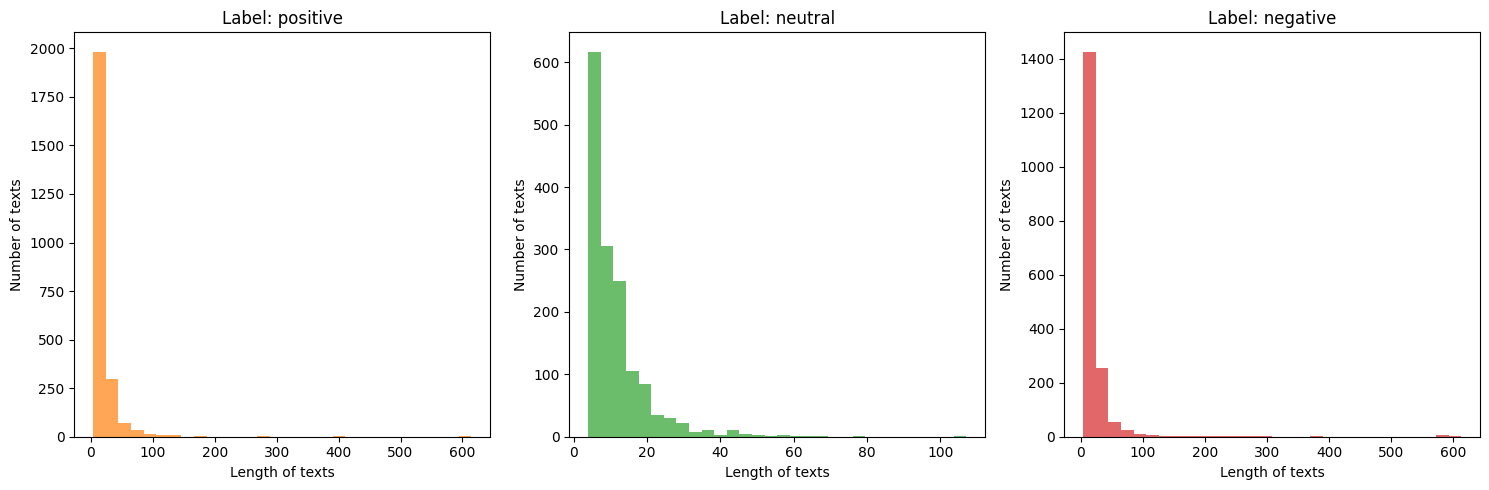

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# data = pd.read_csv("your_file.csv")  # Uncomment this line if loading from a file

# Calculate the length of each text
data['text_length'] = data['text'].apply(lambda x: len(x.split()))  # Count words

# Set up the plot area with subplots for each label
labels = data['label'].unique()  # Get unique labels
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

# Loop through each label and create a histogram
for i, label in enumerate(labels, 1):
    plt.subplot(1, len(labels), i)  # Create subplot for each label
    subset = data[data['label'] == label]  # Filter data for the current label
    plt.hist(subset['text_length'], bins=30, alpha=0.7, color='C{}'.format(i))  # Plot histogram
    plt.title(f"Label: {label}")
    plt.xlabel("Length of texts")
    plt.ylabel("Number of texts")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


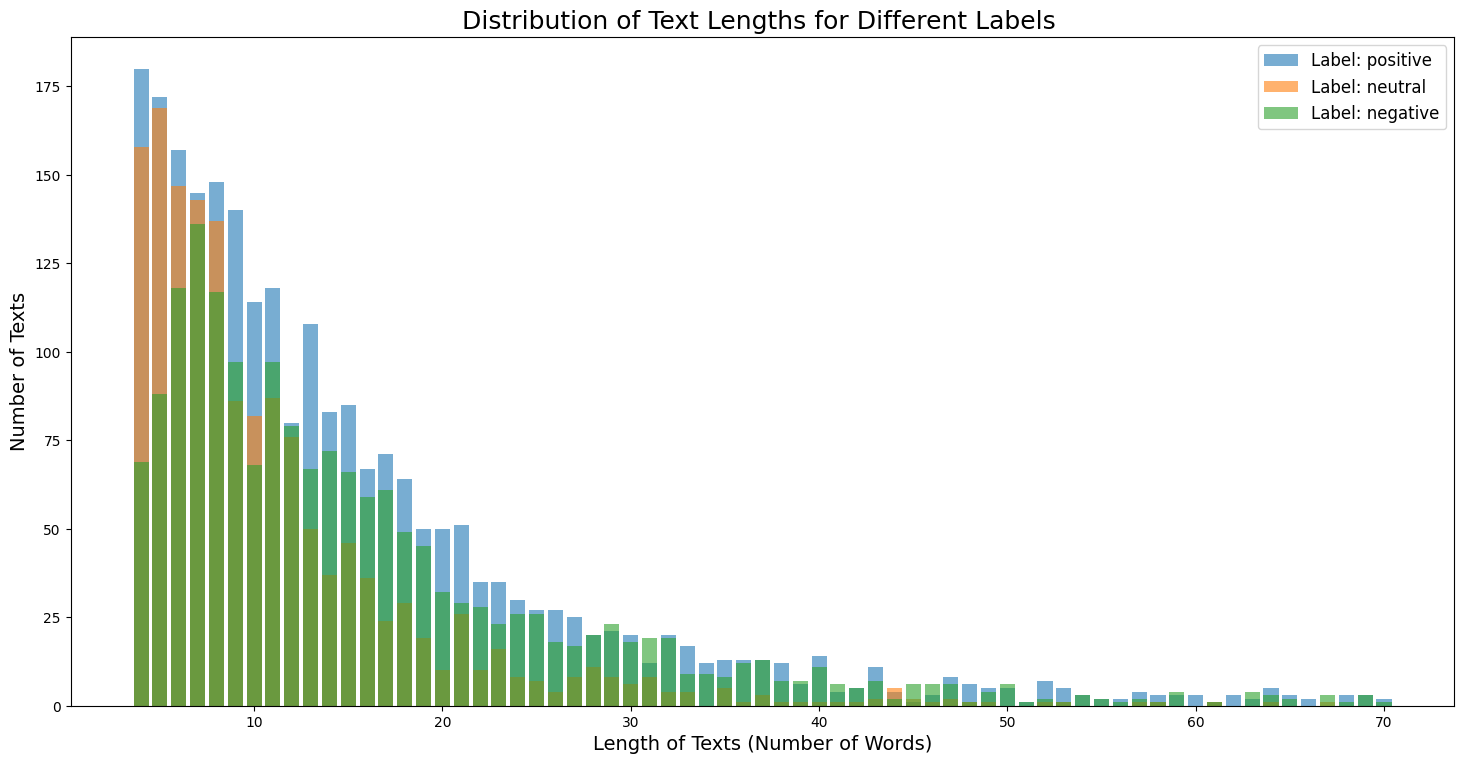

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# data = pd.read_csv("your_file.csv")  # Uncomment this line if loading from a file

# Calculate the length of each text
data['text_length'] = data['text'].apply(lambda x: len(x.split()))  # Count words

# Filter out texts with length greater than 85 words
data_filtered = data[data['text_length'] <= 70]

# Set up the plot with a larger size
plt.figure(figsize=(15, 8))  # Adjust the figure size to make it larger

# Loop through each label and create a bar chart
labels = data_filtered['label'].unique()  # Get unique labels
for label in labels:
    subset = data_filtered[data_filtered['label'] == label]  # Filter data for the current label
    # Get the frequency of each text length for the current label
    length_counts = subset['text_length'].value_counts().sort_index()

    # Plot bar chart for the current label
    plt.bar(length_counts.index, length_counts.values, alpha=0.6, label=f"Label: {label}")

# Add titles and labels
plt.title("Distribution of Text Lengths for Different Labels ", fontsize=18)
plt.xlabel("Length of Texts (Number of Words)", fontsize=14)
plt.ylabel("Number of Texts", fontsize=14)

# Show the legend
plt.legend(fontsize=12)

# Adjust layout to clean up excess white space
plt.tight_layout(pad=2.0)  # Increase padding to ensure the plot is not cramped

# Show the plot
plt.show()
